In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.colors import ListedColormap

In [25]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))

    Z= classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

In [26]:
class AdalineSGD(object):
    def __init__(self,eta=0.01,n_iter=10,shuffle=True,random_state=None):
        self.eta=eta
        self.n_iter=n_iter
        self.w_initialized=False
        self.shuffle=shuffle
        self.random_state=random_state
    
    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.cost_=[]
        for i in range(self.n_iter):
            if self.shuffle:
                X,y=self._shuffle(X,y)
            cost=[]
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost=sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self,X,y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
            for xi,target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self
    
    def _shuffle(self,X,y):
        r=self.rgen.permutation(len(y))
        return X[r],y[r]
    
    def _initialize_weights(self,m):
        self.rgen=np.random.RandomState(self.random_state)
        self.w_=self.rgen.normal(loc=0.0,scale=0.01,size=1+m)
        self.w_initialized=True

    def _update_weights(self,xi,target):
        output=self.activation(self.net_input(xi))
        error=(target-output)
        self.w_[1:]+=self.eta*xi.dot(error)
        self.w_[0]+=self.eta*error
        cost=0.5*error**2
        return cost
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def activation(self,X):
        return X
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X))>=0.0,1,-1)
    

In [27]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
df = pd.read_csv(s, header=None, encoding='utf-8')
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values
X_std = np.copy(X)
X_std[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()

/var/folders/n5/tlxc8mrn4t93k35b66s0br0h0000gn/T/ipykernel_79068/484664874.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)


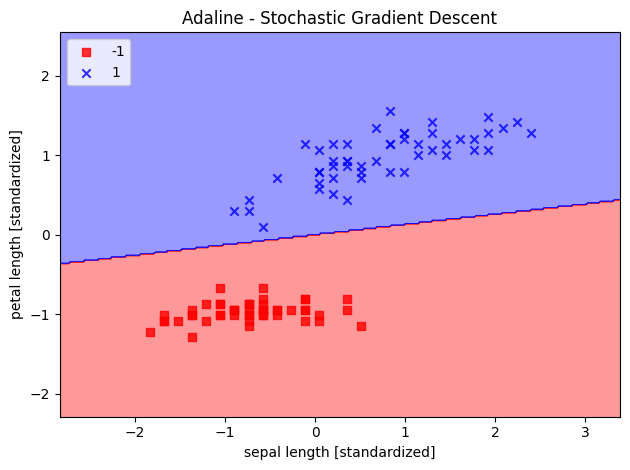

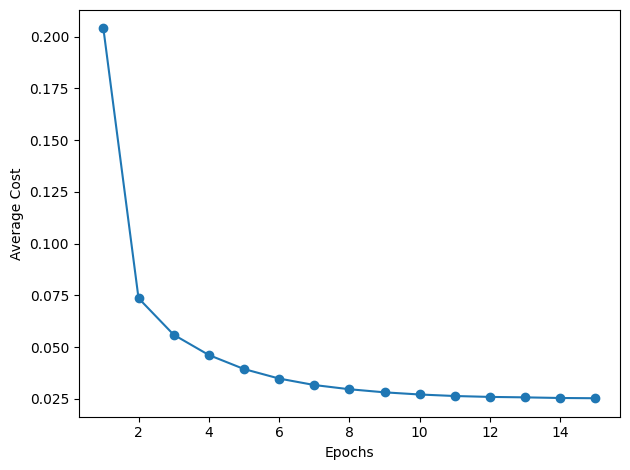

In [28]:
ada_sgd=AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada_sgd.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada_sgd.cost_)+1),ada_sgd.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()
